In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Synthesize spectral data

In [2]:
# parameters
num_peak = 10
magnitude = 10
lower_bound = 1200
upper_bound = 1800
num_samples = 500

# synthesize the specta
np.random.seed(40)
peak_amplitude = np.random.rand(num_peak)*magnitude
peak_location = np.random.rand(num_peak)*(upper_bound-lower_bound)
peak_std = np.random.rand(num_peak)*magnitude/2
x = np.arange(lower_bound,upper_bound, 2)
assay = 2 + np.random.rand(num_samples)
y_list = []

for i in range(num_samples): 
    y = np.random.rand(len(x))*magnitude/10
    for j in range(num_peak):
        y += norm.pdf(x, lower_bound+peak_location[j], peak_std[j])*(upper_bound-lower_bound)
    y += np.random.rand(len(x))*assay[i]
    y_list.append(y)
df = pd.DataFrame(y_list, columns=x)

In [3]:
df

,1200,1202,1204,1206,1208,1210,1212,1214,1216,1218,...,1780,1782,1784,1786,1788,1790,1792,1794,1796,1798
0,1.248820,1.221416,2.085044,3.260258,9.422971,19.409270,34.070061,49.866203,59.381656,56.769541,...,2.536242,1.792195,1.583206,4.243482,224.698174,71.984408,3.445158,3.555673,0.976922,2.424288
1,1.331866,1.089389,3.789896,4.493608,7.990925,17.700103,32.700406,48.499950,59.613468,56.172037,...,2.967264,1.780449,0.530295,6.226653,225.723355,72.560610,0.780425,2.171985,2.847858,0.316820
2,2.183387,2.130425,2.188582,3.772056,8.390091,17.954482,33.088336,48.774559,58.841239,54.434301,...,0.473386,0.612038,2.245728,4.804943,225.048475,71.892321,1.917103,1.379327,1.018165,2.121009
3,0.971973,2.720495,3.415294,3.253578,9.473286,19.245996,33.158357,49.990463,57.352999,55.417759,...,1.350190,0.463674,1.362965,5.810861,224.355544,73.783728,0.440123,0.288354,1.918651,0.661803
4,0.880610,2.162891,2.556876,4.078108,7.513798,18.269155,33.707021,50.605757,59.296974,55.842806,...,0.755322,0.741513,2.580224,4.955779,224.889560,72.667410,2.026294,0.432725,1.958950,2.192778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.154760,1.407664,2.559744,5.661367,8.327666,18.524108,33.479924,49.882936,58.260790,56.445755,...,0.572191,2.085311,1.605936,5.834093,224.207446,73.600989,3.482164,1.429228,3.048391,0.469464
496,2.214262,1.884675,2.488553,3.088434,8.863116,19.414097,33.140624,50.509081,58.109522,55.111988,...,2.362756,1.407637,1.427542,5.005470,224.503704,71.300635,2.472670,1.986941,1.992834,2.665675
497,1.417830,2.408567,1.974817,4.828104,8.686773,19.027846,34.289344,49.866008,58.457321,54.990285,...,3.056004,2.868858,2.142740,5.056935,225.123105,71.929413,0.762757,0.289575,1.821050,1.343326
498,1.052604,1.189900,2.195816,4.716890,9.191821,18.803218,33.661308,49.421172,58.459354,55.147477,...,1.000305,2.458952,2.134806,3.816252,224.177978,71.598976,2.056641,1.985442,0.339004,0.777338


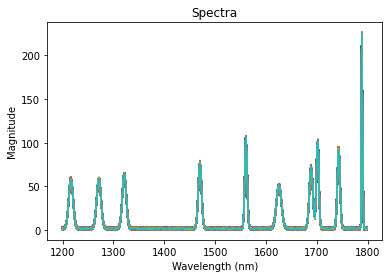

In [4]:
plt.plot(df.T)
plt.title('Spectra')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude')
# plt.ylim([0, 50])
plt.show()

# Partial least square regression
PLS model is created to predict the assay value

In [5]:
from sklearn.model_selection import train_test_split

excluded = 100

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.values[:, :int((upper_bound-lower_bound)/2)-excluded], assay, test_size=0.2, random_state=42)

In [6]:
from sklearn.cross_decomposition import PLSRegression

# pls regression
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

PLSRegression(n_components=3)

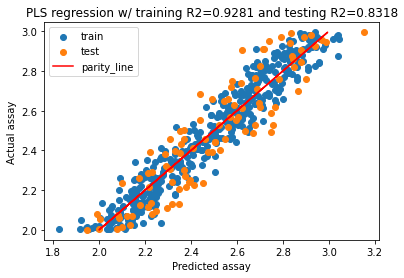

In [7]:
plt.scatter(pls.predict(X_train), y_train, label='train')
plt.scatter(pls.predict(X_test), y_test, label='test')
plt.plot(assay, assay, 'r', label='parity_line')
plt.xlabel('Predicted assay')
plt.ylabel('Actual assay')
plt.title('PLS regression w/ training R2={:4.4f} and testing R2={:4.4f}'.format(pls.score(X_train, y_train), pls.score(X_test, y_test)))
plt.legend()
plt.show()

The PLS model can succesfully predict the assay value on the testing data set

# Drifted spectra: shifted

In [8]:
shift = 2
_, X_shifted = train_test_split(df.values[:, shift:int((upper_bound-lower_bound)/2)-excluded+shift], test_size=0.2, random_state=42)

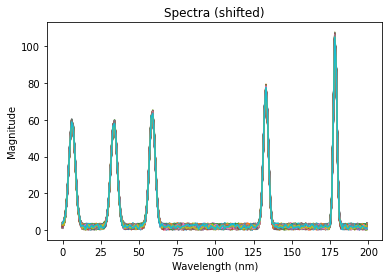

In [9]:
plt.plot(X_shifted.T)
plt.title('Spectra (shifted)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude')
plt.show()

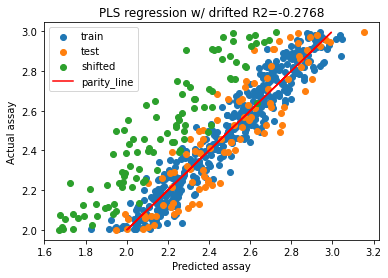

In [11]:
plt.scatter(pls.predict(X_train), y_train, label='train')
plt.scatter(pls.predict(X_test), y_test, label='test')
plt.scatter(pls.predict(X_shifted), y_test, label='shifted')
plt.plot(assay, assay, 'r', label='parity_line')
plt.xlabel('Predicted assay')
plt.ylabel('Actual assay')
plt.title('PLS regression w/ drifted R2={:4.4f}'.format(pls.score(X_shifted, y_test)))
plt.legend()
plt.show()

The PLS model will perform poorly on shifted spectra, which cannot be observed easily

# Drift detection model: PLS-DA for classification

In [12]:
intro_shift = 2 # shift level been introduced to the synthesized shifted data
X_cls = np.concatenate((df.values[:, :int((upper_bound-lower_bound)/2)-excluded], df.values[:, intro_shift:int((upper_bound-lower_bound)/2)-excluded+intro_shift]))
y_cls = np.concatenate((np.zeros(len(df)), np.ones(len(df)))) # response variable: 1-shifted, 0-unshifted

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [13]:
# pls-da model for classification
pls_cls = PLSRegression(n_components=8)
pls_cls.fit(X_cls_train, y_cls_train)

PLSRegression(n_components=8)

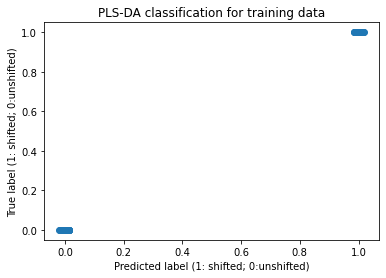

In [14]:
plt.scatter(pls_cls.predict(X_cls_train), y_cls_train)
plt.xlabel('Predicted label (1: shifted; 0:unshifted)')
plt.ylabel('True label (1: shifted; 0:unshifted)')
plt.title('PLS-DA classification for training data')
plt.show()

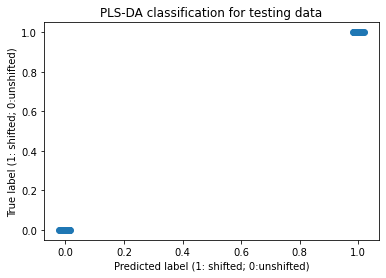

In [15]:
plt.scatter(pls_cls.predict(X_cls_test), y_cls_test)
plt.xlabel('Predicted label (1: shifted; 0:unshifted)')
plt.ylabel('True label (1: shifted; 0:unshifted)')
plt.title('PLS-DA classification for testing data')
plt.show()

In [16]:
# synthesize unseen shift
test_shift = 1
X_shift_test = df.values[:, test_shift:int((upper_bound-lower_bound)/2)-excluded+test_shift]

In [18]:
print('Accuracy for unseen shifted data is {:4.4f}'.format((pls_cls.predict(X_shift_test)>0.5).sum()/len(X_shift_test)))

Accuracy for unseen shifted data is 0.9880


# Conclusions

- Drifted data can be encountered in practical usage, which will lead to inaccurate prediction on established models
- Using PLS-DA, we can build model drift detection tools with the data synthesized by the calibration data set
- The PLS-DA model is helpful to detect the drifted data and avoid inaccurate prediction
- This example provides a high-level demonstration on the model drift detection using PLS-DA as the classification tool with synthesized data. However, real-world data is much more complicated and additional caution will be needed